In [29]:
# 구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix

In [ ]:
!pwd

/content


In [ ]:
# 데이터 로드
URL = "/content/drive/MyDrive/SIL/WORK/DSS 머신러닝2/" # 데이터 경로 설정

df = pd.read_csv(URL+"data/KNN_multiclass_data.csv") # 데이터 로드
# df = pd.read_csv("/content/drive/MyDrive/SIL/WORK/DSS 머신러닝2/data/KNN_multiclass_data.csv")

In [ ]:
df.head(10)

,Class,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60
0,Type_C,0.000000,0.000000,0,0.000000,28.800730,0.000000,0,19.897913,0.000000,...,0.000000,22.205267,36.889362,0,4.008109,11.122004,0.000000,0,0.861596,0
1,Type_C,0.000000,7.379192,0,0.000000,55.324707,0.000000,0,17.763159,0.000000,...,0.000000,25.680260,36.490791,0,0.000000,0.000000,0.000000,0,18.000359,0
2,Type_C,0.000000,0.000000,0,0.000000,9.441565,0.000000,0,8.074228,5.014658,...,0.000000,0.000000,20.628450,0,2.239943,0.000000,0.000000,0,0.000000,0
3,Type_C,0.000000,0.000000,0,0.000000,38.792530,0.000000,0,19.175306,0.550448,...,11.169135,18.659679,7.790253,0,9.356702,0.000000,0.045151,0,0.000000,0
4,Type_C,0.000000,0.000000,0,11.082972,4.865292,0.000000,0,0.000000,8.450891,...,15.215648,24.295647,11.544920,0,0.000000,0.000000,0.000000,0,5.172331,0
5,Type_C,0.000000,0.000000,0,0.000000,0.000000,0.000000,0,15.023901,3.542971,...,0.000000,0.000000,18.815767,0,0.000000,19.855614,0.000000,0,0.000000,0
6,Type_C,0.000000,0.000000,0,0.000000,16.643148,0.000000,0,0.000000,7.105449,...,0.000000,0.000000,14.860317,0,0.000000,0.000000,0.000000,0,0.000000,0
7,Type_C,1.880968,0.000000,0,0.000000,0.000000,0.000000,0,1.695240,0.000000,...,0.000000,50.173447,32.229771,0,9.866442,8.500020,0.000000,0,0.000000,0
8,Type_C,0.000000,0.000000,0,0.000000,23.745300,13.970112,0,4.204913,10.745239,...,22.680828,9.743242,22.081636,0,0.000000,0.000000,6.477305,0,0.000000,0
9,Type_C,0.000000,0.469354,0,5.875203,32.415726,0.000000,0,6.380740,1.578491,...,0.000000,4.933801,26.821512,0,0.000000,0.000000,3.141470,0,4.770092,0


In [ ]:
# df.info()

In [30]:
df.isna().sum().sum()

0

In [ ]:
print(df.shape)
print(" ")
print(df['Class'].unique()) # 불량 유형 확인
print(" ")



print(df['Class'].value_counts()) # 불량 타입별 수 확인 normalize=True 시, 비율로 반환
print(" ")
print(df['Class'].value_counts(normalize=True))

(2369, 61)
 
['Type_C' 'Type_B' 'Type_A' 'Type_D']
 
Type_A    1140
Type_B     824
Type_C     268
Type_D     137
Name: Class, dtype: int64
 
Type_A    0.481216
Type_B    0.347826
Type_C    0.113128
Type_D    0.057830
Name: Class, dtype: float64


In [ ]:
# 입력변수 출력변수 정의
#axis=0: 행, axis=1: 열
data_X = df.drop(["Class"], axis = 1)
data_Y = df['Class']

In [ ]:
new_data_X = df.drop(["Class", "V1","V2","V3"], axis = 1)

In [ ]:
new_data_X

,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,...,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60
0,0.000000,28.800730,0.000000,0,19.897913,0.000000,0.000000,37.648525,0,0.000000,...,0.000000,22.205267,36.889362,0,4.008109,11.122004,0.000000,0,0.861596,0
1,0.000000,55.324707,0.000000,0,17.763159,0.000000,9.708741,19.497030,0,0.000000,...,0.000000,25.680260,36.490791,0,0.000000,0.000000,0.000000,0,18.000359,0
2,0.000000,9.441565,0.000000,0,8.074228,5.014658,0.000000,13.353352,0,0.000000,...,0.000000,0.000000,20.628450,0,2.239943,0.000000,0.000000,0,0.000000,0
3,0.000000,38.792530,0.000000,0,19.175306,0.550448,14.966192,16.364195,0,6.254686,...,11.169135,18.659679,7.790253,0,9.356702,0.000000,0.045151,0,0.000000,0
4,11.082972,4.865292,0.000000,0,0.000000,8.450891,0.000000,9.454563,0,0.000000,...,15.215648,24.295647,11.544920,0,0.000000,0.000000,0.000000,0,5.172331,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2364,0.359649,0.000000,9.003910,0,0.000000,6.780496,35.103897,0.000000,0,0.000000,...,3.680651,0.000000,0.000000,0,0.490612,0.000000,10.994208,0,0.000000,0
2365,0.000000,0.000000,0.000000,0,0.000000,8.615059,32.194416,5.267873,0,0.000000,...,0.000000,0.000000,5.216145,0,3.168498,0.000000,0.808140,0,0.000000,0
2366,1.127717,0.000000,7.696028,0,0.000000,13.796430,18.222700,4.285450,0,0.418523,...,12.812173,9.001384,0.000000,0,0.325467,0.000000,6.563852,0,0.000000,0
2367,0.000000,0.000000,7.725848,0,1.525421,13.614187,30.533714,1.336133,0,0.000000,...,9.068219,0.000000,1.619621,0,0.000000,0.000000,8.611509,0,0.000000,0


In [ ]:
# test_size = 0.2 : 학습 데이터와 테스트 데이터의 비율을 설정하는 하이퍼파라미터
# stratify = Y_label의 비율을 고려하여 나눠주는 하이퍼파라미터 (Class imbalance 상황에서는 설정하는 것이 굉장히 중요)
# shuffle = True

# 대부분의 하이퍼파라미터는 default가 존재함
# Ex1. 이미지들을 한번에 불러올때 imagedatagenerator 모듈을 사용함, shuffle 등의 하이퍼파라미터 default = False
# Ex2. 시계열 데이터 처리, shuffle = False

training_data, validation_data , training_labels, validation_labels = train_test_split(data_X, data_Y, test_size = 0.2, shuffle =True
                                                                                      #  , stratify=data_Y
                                                                                       , random_state = 100)

In [ ]:
print("학습 데이터 셋 크기")
print(training_labels.value_counts(normalize=True))
print("")
print("평가 데이터 셋 크기")
print(validation_labels.value_counts(normalize=True))

학습 데이터 셋 크기
Type_A    0.485488
Type_B    0.347230
Type_C    0.112401
Type_D    0.054881
Name: Class, dtype: float64

평가 데이터 셋 크기
Type_A    0.464135
Type_B    0.350211
Type_C    0.116034
Type_D    0.069620
Name: Class, dtype: float64


In [ ]:
# test_size = 0.25학습 데이터와 테스트 데이터의 비율을 설정하는 하이퍼파라미터
# stratify = Y_label의 비율을 고려하여 나눠주는 하이퍼파라미터 (Class imbalance 상황에서는 설정하는 것이 굉장히 중요)
# shuffle = True

# 대부분의 하이퍼파라미터는 default가 존재함
# Ex1. 이미지들을 한번에 불러올때 imagedatagenerator 모듈을 사용함, shuffle 등의 하이퍼파라미터 default = False
# Ex2. 시계열 데이터 처리, shuffle = False

training_data, validation_data , training_labels, validation_labels = train_test_split(data_X, data_Y, test_size = 0.2, shuffle =True
                                                                                       , stratify=data_Y
                                                                                       , random_state = 42)

In [ ]:
print("학습 데이터 셋 크기")
print(training_labels.value_counts(normalize=True))
print("")
print("평가 데이터 셋 크기")
print(validation_labels.value_counts(normalize=True))

학습 데이터 셋 크기
Type_A    0.481266
Type_B    0.347757
Type_C    0.112929
Type_D    0.058047
Name: Class, dtype: float64

평가 데이터 셋 크기
Type_A    0.481013
Type_B    0.348101
Type_C    0.113924
Type_D    0.056962
Name: Class, dtype: float64


In [ ]:
# from sklearn.preprocessing import MinMaxScaler
# #스케일링
# scaler = MinMaxScaler()
# scaler.fit(training_data)
# training_data= scaler.transform(training_data)
# validation_data = scaler.transform(validation_data)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# n_neighbors = K
classifier = KNeighborsClassifier(n_neighbors = 3)
classifier.fit(training_data, training_labels)



preds = classifier.predict(validation_data) # 테스트 데이터 예측

train_preds = classifier.predict(training_data) # 학습 결과

print("학습데이터에 대한 성능")
print(classifier.score(training_data, training_labels))

print("실제 값")
print(validation_labels.iloc[:10].values)
print("예측 결과")
print(preds[:10])
print("")


print("성능")
print(classifier.score(validation_data, validation_labels))



# Regression 문제를 풀고자 하는 경우
from sklearn.neighbors import KNeighborsRegressor


학습데이터에 대한 성능
0.9773087071240105
실제 값
['Type_B' 'Type_A' 'Type_B' 'Type_A' 'Type_B' 'Type_D' 'Type_A' 'Type_D'
 'Type_D' 'Type_B']
예측 결과
['Type_B' 'Type_A' 'Type_A' 'Type_A' 'Type_B' 'Type_A' 'Type_A' 'Type_D'
 'Type_D' 'Type_B']

성능
0.9578059071729957


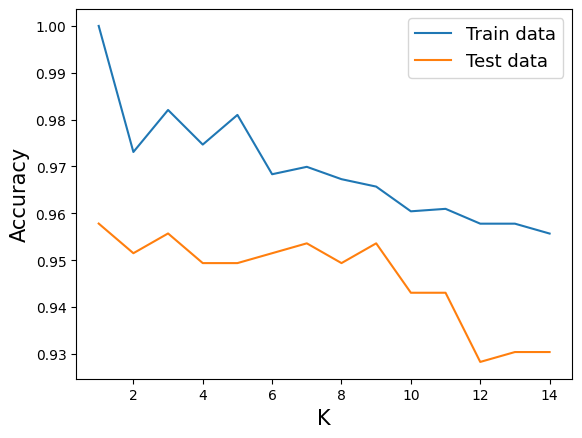

In [ ]:
import matplotlib.pyplot as plt
k_list = range(1,15) # K 설정
train_accuracies = []
test_accuracies = []

for k in k_list:
  classifier = KNeighborsClassifier(n_neighbors = k)
  classifier.fit(training_data, training_labels)
  train_accuracies.append(classifier.score(training_data, training_labels))
  test_accuracies.append(classifier.score(validation_data, validation_labels))
plt.plot(k_list, train_accuracies,label="Train data")
plt.plot(k_list, test_accuracies,label="Test data")
plt.xlabel("K",fontsize = 15)
plt.ylabel("Accuracy",fontsize = 15)
plt.legend(fontsize= 13)
plt.show()

In [ ]:
def print_all_reg(Y_test,pred):
    # Specificity를 구하기 위해 confusion matrix를 이용

    cm1 = confusion_matrix(Y_test,pred)
    specificity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])

    #결과 검사
    #recall = cm1[1,1]/(cm1[1,1]+cm1[1,0])
    #pre = cm1[1,1]/(cm1[1,1]+cm1[0,1])

    G_mean = recall_score(Y_test,pred,average = 'weighted') * specificity1 #클래스별로 정확도를 조합하여 모델의 성능을 종합적으로 평가하는 지표
    print("model의 recall 값은 {:.3f}".format(recall_score(Y_test,pred,average = 'weighted')))
    print("model의 2종 오류 확률 값은 {:.3f}".format(1-recall_score(Y_test,pred,average = 'weighted')))
    print("model의 Specificity 값은 {:.3f}".format(specificity1))
    print("model의 1종 오류 확률 값은 {:.3f}".format(1-specificity1))
    print("model의 precision 값은 {:.3f}".format(precision_score(Y_test,pred,average = 'weighted')))
    print("model의 f1_score 값은 {:.3f}".format(f1_score(Y_test,pred,average = 'weighted')))
    print("model의 G-mean 값은 {:.3f}".format(np.sqrt(G_mean)))
    print("model의 accuracy 값은 {:.3f}".format(accuracy_score(Y_test,pred)))

In [ ]:
print_all_reg(training_labels,train_preds)
print(" ")
print_all_reg(validation_labels,preds)

model의 recall 값은 0.982
model의 2종 오류 확률 값은 0.018
model의 Specificity 값은 0.997
model의 1종 오류 확률 값은 0.003
model의 precision 값은 0.982
model의 f1_score 값은 0.982
model의 G-mean 값은 0.989
model의 accuracy 값은 0.982
 
model의 recall 값은 0.956
model의 2종 오류 확률 값은 0.044
model의 Specificity 값은 0.974
model의 1종 오류 확률 값은 0.026
model의 precision 값은 0.956
model의 f1_score 값은 0.955
model의 G-mean 값은 0.965
model의 accuracy 값은 0.956
